# Red Neuronal Convolucional en Keras

Implementación de una red neuronal artificial de arquitectura convolucional utilizando la interfaz de tensorflow y keras.
La aplicación utilizada para probar la implementación del modelo es la del reconocimiento de dígitos escritos a mano, MNIST.

Autor: M. en C. Mario Xavier Canche Uc, Agosto 2020, mario.canche@cimat.mx

Basado en: https://www.cimat.mx/~mrivera/cursos/aprendizaje_profundo/introduccion_convnets/introduccion_convnets.html

## Cargamos las librerias

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score 
from sklearn.metrics import f1_score, cohen_kappa_score
import seaborn as sns 

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
from tensorflow.keras import models

import time
import numpy as np

## Cargamos la base de datos MNIST

In [2]:
# Como las imágenes de MNIST son en niveles de gris (un solo canal)
# tenemos que agregar una dimensión extra al tensor de datos que corresponde
# al número de canales y debera ser igual a 1.

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

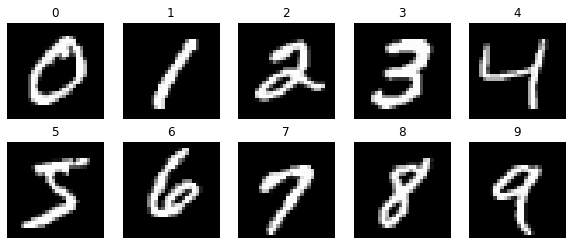

In [3]:
# Visualizamos una muestra de los datos
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    idx = list(train_labels).index(i)
    plt.imshow(train_images[idx], 'gray')
    plt.title(train_labels[idx])
    plt.axis('off')
    
#plt.savefig('example_mnist.png')    
plt.show()

In [4]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

In [5]:
# Convertimos las etiquetas con valores enteros a categóricos (codificación one-hot o variables indicadoras)
train_labels = to_categorical(train_labels)
test_labels  = to_categorical(test_labels)

## Definimos la Arquitectura de la Red

In [6]:
# Arquitectura de la red
convNN = models.Sequential()
# Agregamos las capas convolucionales
convNN.add(layers.Conv2D(filters     =32, 
                         kernel_size =(3, 3), 
                         activation  ='relu', 
                         input_shape =(28, 28, 1)))
convNN.add(layers.MaxPooling2D(pool_size=(2, 2)))
convNN.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
convNN.add(layers.MaxPooling2D(pool_size=(2, 2)))
convNN.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

# Ahora agregamos una red similar con una arquitectura perceptron multicapas
convNN.add(layers.Flatten())
convNN.add(layers.Dense(units=64, activation='relu'))
convNN.add(layers.Dense(units=10, activation='softmax'))

In [7]:
convNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [8]:
# Compilamos el modelo, que es definir los parámetrso de la estpa de entrenamiento.
convNN.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Entrenamos el Modelo

In [9]:
# Procedemos a realizar el entrenamiento
tic = time.time()

convNN.fit(x = train_images, 
           y = train_labels, 
           epochs    =10, 
           batch_size=64,
          verbose=2)

print('seconds=', time.time()-tic)

Train on 60000 samples
Epoch 1/10
60000/60000 - 34s - loss: 0.1802 - accuracy: 0.9447
Epoch 2/10
60000/60000 - 36s - loss: 0.0490 - accuracy: 0.9845
Epoch 3/10
60000/60000 - 35s - loss: 0.0338 - accuracy: 0.9897
Epoch 4/10
60000/60000 - 36s - loss: 0.0252 - accuracy: 0.9924
Epoch 5/10
60000/60000 - 36s - loss: 0.0195 - accuracy: 0.9939
Epoch 6/10
60000/60000 - 36s - loss: 0.0151 - accuracy: 0.9956
Epoch 7/10
60000/60000 - 41s - loss: 0.0124 - accuracy: 0.9961
Epoch 8/10
60000/60000 - 46s - loss: 0.0107 - accuracy: 0.9967
Epoch 9/10
60000/60000 - 55s - loss: 0.0089 - accuracy: 0.9974
Epoch 10/10
60000/60000 - 54s - loss: 0.0074 - accuracy: 0.9980
seconds= 409.03173208236694


In [10]:
# Evaluando el modelo
test_loss, test_acc = convNN.evaluate(test_images, test_labels)
print('Accuracy:' ,test_acc)

10000/10000 [==============================] - 4s 450us/sample - loss: 0.0435 - accuracy: 0.9902
Accuracy: 0.9902


## Graficamos la matriz de confusión

In [11]:
test_predicted_labels = convNN.predict(test_images)
test_true_labels      = np.argmax(test_labels,axis=1)
test_predicted_labels = np.argmax(test_predicted_labels,axis=1)

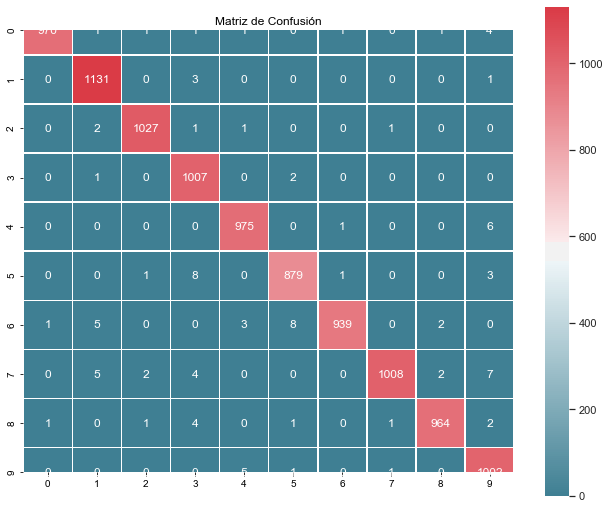

In [12]:
C = confusion_matrix(test_true_labels, test_predicted_labels)

f, ax = plt.subplots(figsize=(11, 9))
sns.set()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax = sns.heatmap(C, cmap=cmap, square=True,
                 annot=True, fmt='d', linewidths=.5)
ax.set_title('Matriz de Confusión')
#plt.savefig('confusion_matrix_keras1.png')
plt.show()